In [2]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 28547 files belonging to 2 classes.


In [4]:
data_iterator = data.as_numpy_iterator()

In [5]:
batch = data_iterator.next()

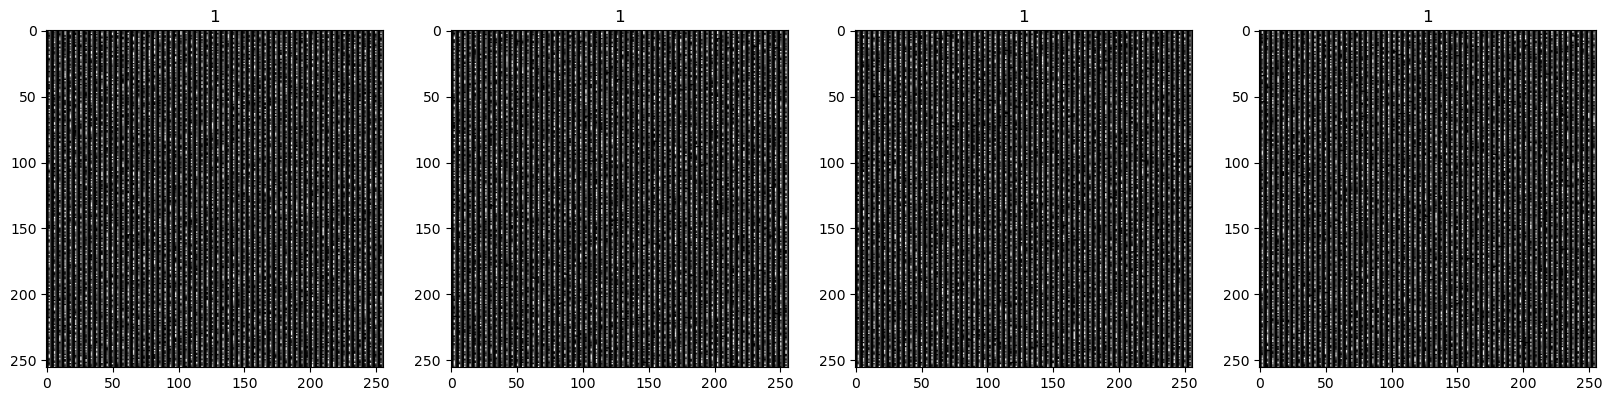

In [6]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [7]:
data = data.map(lambda x,y: (x/255, y))

In [8]:
data.as_numpy_iterator().next()

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.2784314 , 0.2784314 , 0.2784314 ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.9019608 , 0.9019608 , 0.9019608 ],
          [0.25882354, 0.25882354, 0.25882354]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.72156864, 0.72156864, 0.72156864],
          ...,
          [0.        , 0.        , 0.        ],
          [0.04313726, 0.04313726, 0.04313726],
          [0.2627451 , 0.2627451 , 0.2627451 ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.2509804 , 0.2509804 , 0.2509804 ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.23529412, 0.23529412, 0.23529412],
          [0.25882354, 0.25882354, 0.25882354]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [9]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [10]:
train_size

625

In [11]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [12]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [14]:
model = Sequential()

In [15]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [18]:
logdir='logs'

In [19]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [20]:
hist = model.fit(train, epochs=5, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5
625/625 [==============================] - 375s 597ms/step - loss: 0.3444 - accuracy: 0.8709 - val_loss: 0.3032 - val_accuracy: 0.8822
Epoch 2/5
625/625 [==============================] - 379s 606ms/step - loss: 0.2820 - accuracy: 0.8899 - val_loss: 0.2589 - val_accuracy: 0.9010
Epoch 3/5
625/625 [==============================] - 378s 604ms/step - loss: 0.2385 - accuracy: 0.9114 - val_loss: 0.2519 - val_accuracy: 0.9085
Epoch 4/5
625/625 [==============================] - 384s 614ms/step - loss: 0.1983 - accuracy: 0.9252 - val_loss: 0.2509 - val_accuracy: 0.9134
Epoch 5/5
625/625 [==============================] - 381s 609ms/step - loss: 0.1614 - accuracy: 0.9391 - val_loss: 0.2795 - val_accuracy: 0.9106


In [58]:
model.save_weights('model_malware.h5')

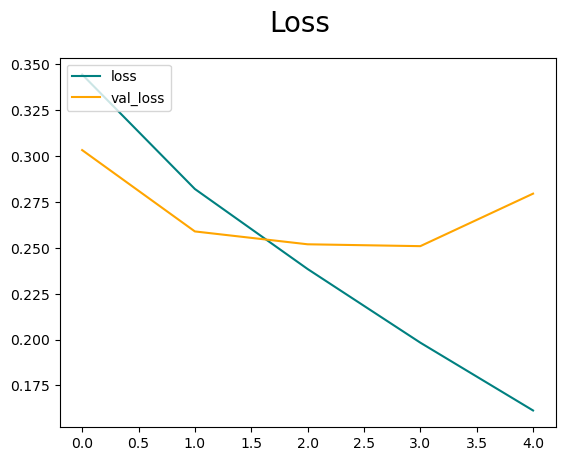

In [23]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

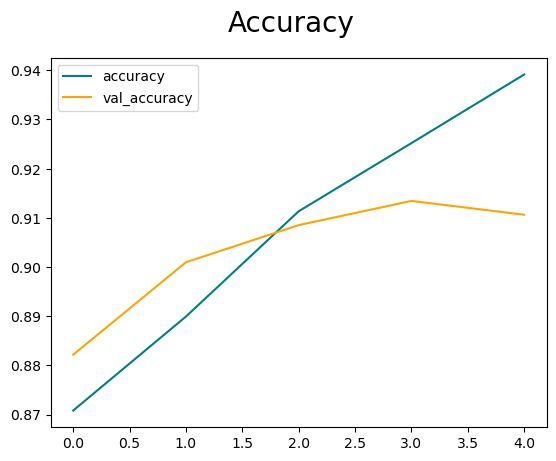

In [24]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [25]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [26]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [27]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 161ms/step


In [28]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.936, shape=(), dtype=float32) tf.Tensor(0.96059114, shape=(), dtype=float32) tf.Tensor(0.9101124, shape=(), dtype=float32)


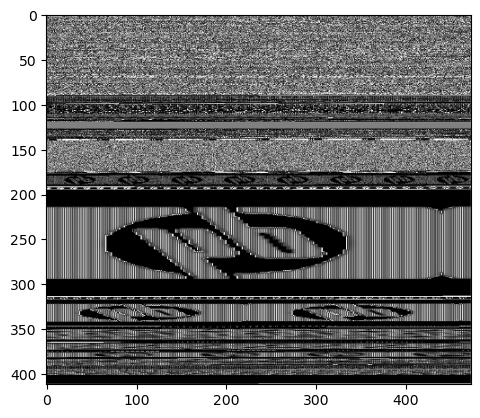

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('testmal.png')
imgplot = plt.imshow(img)
plt.show()